In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# Machine learning algorithms
from sklearn.svm import SVR #Support vector machine

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
PS: When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
        i.e. 写int=10会自动转换为KFold(n_splits=10),不会转换为StratifiedKFold(n_splits=10)。
'''
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/x_TotalArea_y_MVPA/x_TotalArea_y_MVPA.xlsx')#to import the preprocessed dataset into a variable

# print(dataset)

In [3]:
X = dataset['X']
y = dataset['Y']
other = pd.DataFrame(dataset.iloc[:,:4])
# print(X, y, other)

In [4]:
X_ = X.values.reshape(-1, 1) # some algorithms need to reshape X if X has a single feature

In [5]:
# Support Vector Machine
'''
Hyper-parameters are parameters that are not directly learnt within estimators. 
    In scikit-learn they are passed as arguments to the constructor of the estimator classes. 
    Typical examples include C, kernel and gamma for Support Vector Classifier.
# kernel = Specifies the kernel type to be used in the algorithm. 
    It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
    If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
# C = Regularization parameter. The strength of the regularization is inversely proportional to C. 
    Must be strictly positive. The penalty is a squared l2 penalty.
# gamma = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    if ‘auto’, uses 1 / n_features.
'''

# Set param_grid, aka the main parameters in RandomForestRegressor
param_grid_SVR = [
    {'kernel': ['linear'],
     'C':np.logspace(0,3,4)
    },
    {'kernel': ['rbf'],
     'gamma':np.logspace(-2,2,5),
     'C':np.logspace(0,3,4)
    },
]

# GridSearchCV
svr = GridSearchCV(estimator=SVR(), # algorithm - AdaBoost Regressor
                    param_grid=param_grid_SVR, # specify the parameters to search over using a dict or list of dictionaries
                    cv=10 # 10-Fold
                    )

# Build the model, aka training the dataset
svr.fit(X_, y)

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ SVR Model")
print("Best parameter: {}".format(svr.best_params_))
print("Best cross-validation score: {:.2f}".format(svr.best_score_))
print("Average score in 10-Fold: \n", svr.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", svr.cv_results_['std_test_score'])
print("Best estimator: {}".format(svr.best_estimator_))
print("The Index of Best estimator: {}".format(svr.best_index_))


------------------ SVR Model
Best parameter: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: -0.17
Average score in 10-Fold: 
 [-0.16795772 -0.16795242 -0.1679313  -0.1680712  -0.16825382 -0.16574836
 -0.16802124 -0.18226106 -0.20771552 -0.16660053 -0.16572985 -0.16847416
 -0.20203138 -0.23165627 -0.16547864 -0.1690453  -0.17731807 -0.21361977
 -0.28358419 -0.16599318 -0.22610782 -0.18253693 -0.26647783 -0.4108293 ]
Std score in 10-Fold: 
 [0.20250014 0.20250376 0.20253952 0.20267362 0.20028918 0.19345425
 0.18986577 0.17860341 0.19486044 0.20090977 0.19135861 0.18378709
 0.1857279  0.20090539 0.19362998 0.19075224 0.18584704 0.19395365
 0.23316949 0.19182596 0.2372447  0.1819916  0.26638158 0.52014619]
Best estimator: SVR(C=100.0, gamma=0.01)
The Index of Best estimator: 14


In [6]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=SVR(C=100.0, gamma=0.01, kernel='rbf'),
                        X=X_, y=y,
                        cv=10
                       )
print(score)

[-0.08413322 -0.0363834  -0.06139117 -0.0303318  -0.72497408 -0.15488232
 -0.20934822 -0.12477251 -0.13121991 -0.09734975]


In [7]:
# Use the above optimal parameters to build new model, aka training the dataset
svr = SVR(C=100.0, gamma=0.01, kernel='rbf').fit(X_, y)

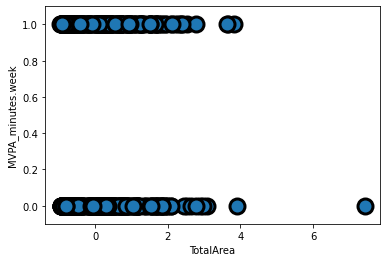

In [18]:
# Draw the Support Vector Machine
## Plot support vectors
sv = svr.support_vectors_
## Class labels of support vectors are given by the sign of the dual coefficient
sv_labels = svr.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('TotalArea')
plt.ylabel('MVPA_minutes.week')

plt.savefig(path_up1Dir +'/x_TotalArea_y_MVPA/x_TotalArea_y_MVPA_SupportVectorMachine.png')
plt.show()